# Logistic Regression with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\SK\\Personal\\Career\\Placements\\Byte Uprise\\Task2\\titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

# Missing Data



In [4]:
df.isnull()

#TRUE means NULL

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# seaborn
We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

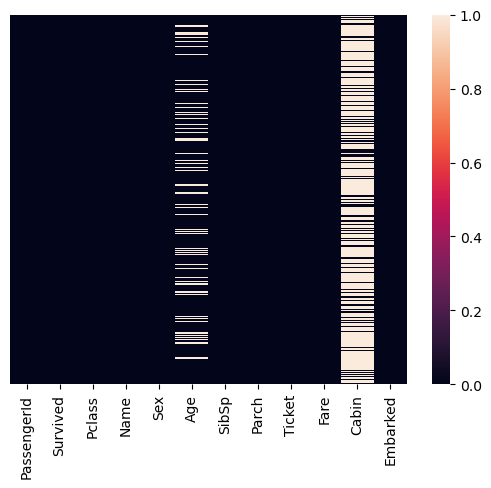

In [13]:
sns.heatmap(df.isnull(),yticklabels=False)

<Axes: >

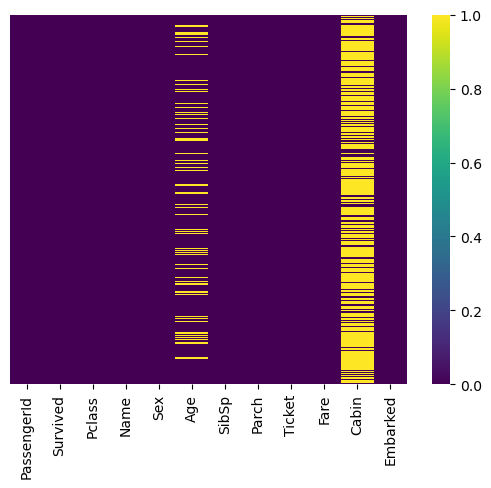

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

# yellow color is because of cmap='viridis'
# Lines in yellow represent null values

<Axes: >

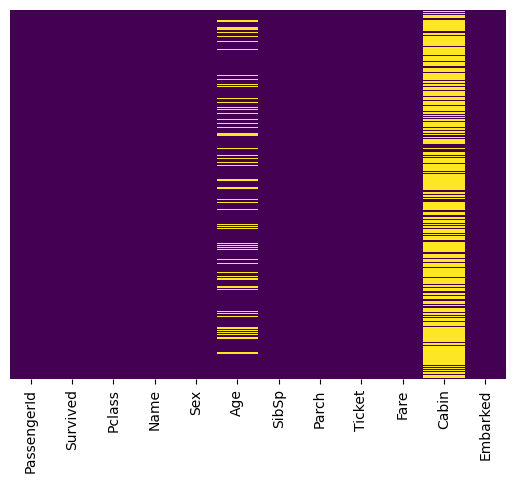

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Observation

Roughly 20 percent of the Age data is missing. 
The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 

Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. 
We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"


<Axes: xlabel='Survived', ylabel='count'>

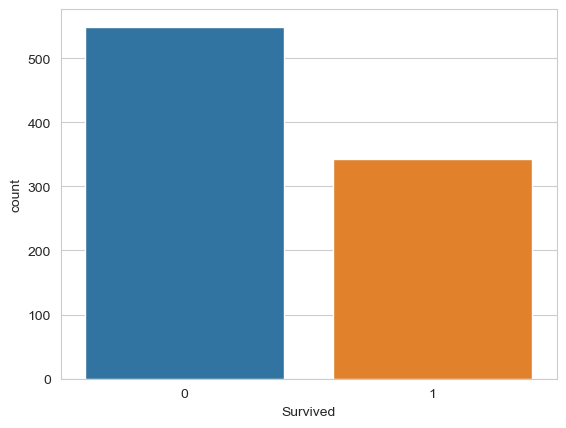

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

#survived = 0  --> person did not survive
#survived = 1  --> person did survive

<Axes: xlabel='Survived', ylabel='count'>

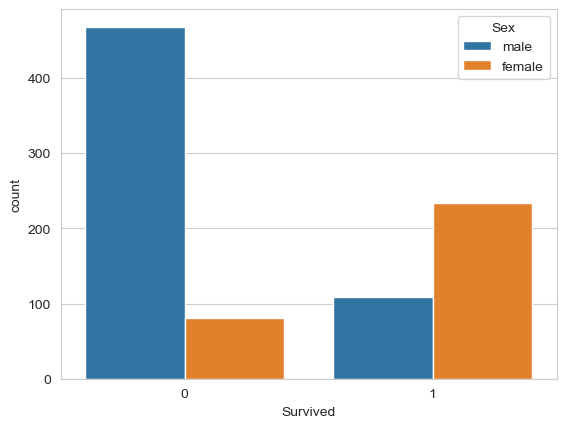

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

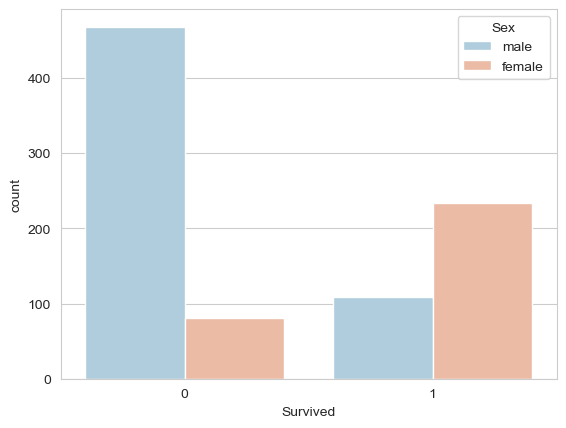

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Sex',palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

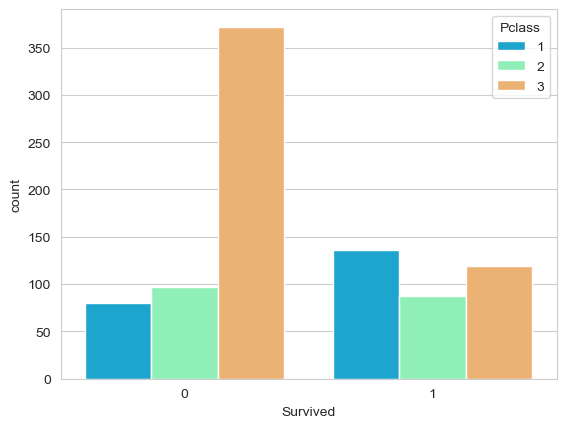

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='rainbow',hue='Pclass')

#Passenger Class = 1 --> Rich 
#Passenger Class = 2 --> Middle Class
#Passenger Class = 3 --> Poor

<Axes: xlabel='Age', ylabel='Count'>

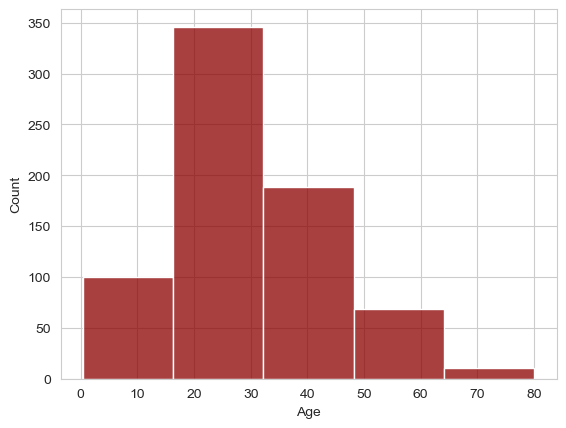

In [41]:
# sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=50)

sns.histplot(df['Age'].dropna(),kde=False,color='darkred',bins=50)

# sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=40)


# sns.distplot: 
# This is a function from the seaborn library used for plotting the distribution of a univariate dataset. 
# It combines a histogram with a kernel density estimate (KDE) plot by default.

# df['Age'].dropna(): 
# This part of the code accesses the 'Age' column of the DataFrame named 'df'. 
# It then applies the .dropna() method to remove any missing values (NaN) from the 'Age' column before plotting the distribution. 
# This ensures that only valid age values are considered in the plot

# kde=False: 
# This parameter specifies whether to include the kernel density estimate (KDE) plot alongside the histogram. 
# By setting it to False, we're indicating that we only want the histogram and not the KDE plot.

# color='darkred': 
# This parameter specifies the color of the histogram bars. 
# In this case, it's set to 'darkred', indicating that the histogram bars will be colored in dark red.

# bins=40: 
# This parameter sets the number of bins (intervals) for the histogram. 
# A larger number of bins will result in a more detailed representation of the distribution, while a smaller number will result in a more coarse representation. 
# Here, it's set to 40 bins, which means the age values will be divided into 40 intervals for plotting.


<Axes: >

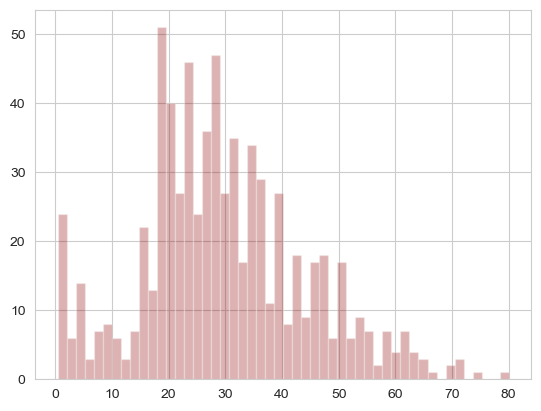

In [39]:
df['Age'].hist(bins=50,color='darkred',alpha=0.3)

# .hist(): 
# This is a method used to create a histogram of the data. 
# It is applied to the 'Age' column of the DataFrame.

# bins=50: 
# This parameter sets the number of bins (intervals) for the histogram.
# A larger number of bins will result in a more detailed representation of the distribution, while a smaller number will result in a more coarse representation. 
# Here, it's set to 50 bins, which means the age values will be divided into 50 intervals for plotting.

# color='darkred': 
# This parameter specifies the color of the histogram bars. 
# In this case, it's set to 'darkred', indicating that the histogram bars will be colored in dark red.

# alpha=0.3: 
# This parameter controls the transparency of the histogram bars. 
# It ranges from 0 to 1, where 0 is fully transparent and 1 is fully opaque. 
# Here, it's set to 0.3, indicating that the histogram bars will be somewhat transparent, allowing underlying patterns to show through.

<Axes: xlabel='SibSp', ylabel='count'>

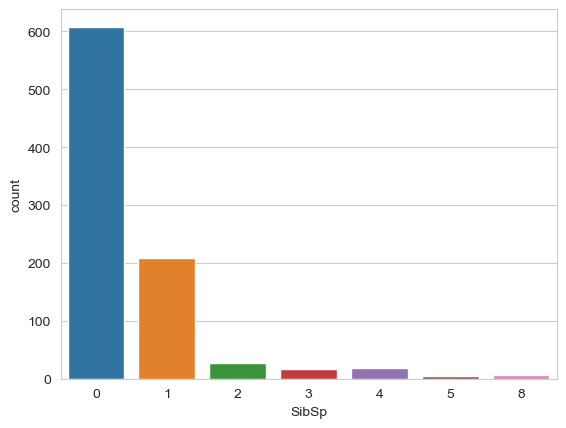

In [43]:
sns.countplot(x='SibSp',data=df)

#SibSp --> sibling or spouse


<Axes: >

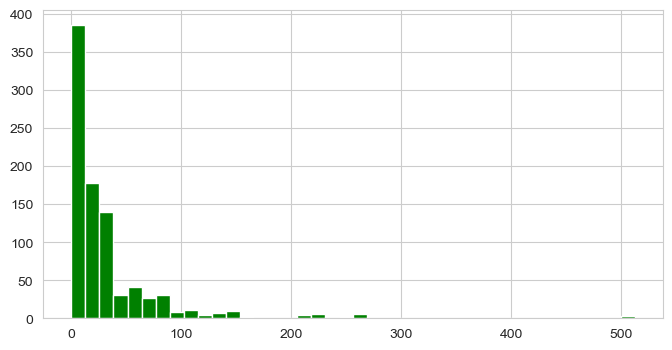

In [44]:
df['Fare'].hist(bins=40,color='green',figsize=(8,4))

# figsize=(8, 4): 
# This parameter sets the size of the figure (the width and height) in inches. 
# Here, it's set to a width of 8 inches and a height of 4 inches, controlling the overall size of the histogram plot. 
# Adjusting this parameter allows you to control the aspect ratio and size of the plot

# Data Cleaning 

We want to fill in missing age data instead of just dropping the missing age data rows. 
One way to do this is by filling in the mean age of all the passengers (imputation). 
However we can check the average age by passenger class. 

<Axes: xlabel='Pclass', ylabel='Age'>

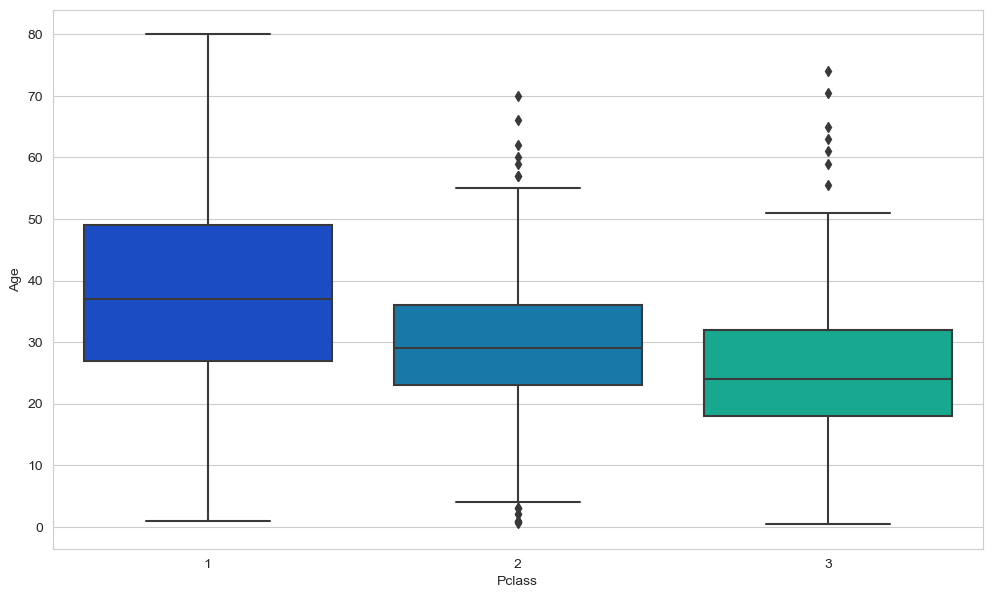

In [50]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

# plt.figure(): 
# This function initializes a new figure or sets the current figure in Matplotlib.

# figsize=(12, 7): 
# This parameter specifies the width and height of the figure in inches. 
# In this case, the width is set to 12 inches, and the height is set to 7 inches.

The middle line gives the average age 

For Passenger Class 1 - Average age is 37
For Passenger Class 2 - Average age is 29
For Passenger Class 3 - Average age is 24

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
We'll use these average age values to impute based on Pclass for Age.

In [52]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

Now apply that function!

In [53]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<Axes: >

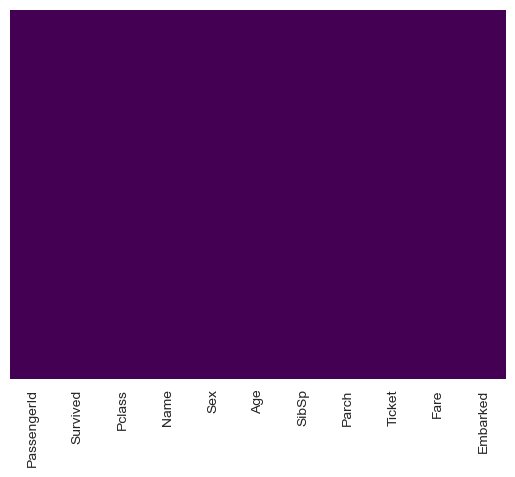

In [64]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No null values in Age column

drop the Cabin column and the row in Embarked that is NaN.

In [62]:
df.drop('Cabin',axis=1,inplace=True)

#The axis=1 parameter specifies that you want to drop columns 
# (as opposed to rows, which would be axis=0).

# inplace=True: 
#This parameter specifies whether to modify the DataFrame in place or return a new DataFrame with the specified columns removed. 
# When inplace=True, the changes are made directly to the original DataFrame 'df', and it's not necessary to assign the result back to 'df'. 
# This helps to save memory by modifying the DataFrame without creating a copy.

KeyError: "['Cabin'] not found in axis"

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [66]:
df.dropna(inplace=True)

# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas
Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [70]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [71]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [73]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [75]:
df = pd.concat([df,sex,embark],axis=1)

In [76]:
df.head()

# Q,S --> for embark

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Our data is ready for our model

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

# Train Test Split

In [77]:
df.drop('Survived',axis=1).head()

# survived -> dependent

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [78]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

In [88]:
from sklearn.model_selection import train_test_split

X_df, X_test, y_df, y_test = train_test_split(df.drop('Survived', axis=1),
                                              df['Survived'],
                                              test_size=0.30,
                                              random_state=101)


# Training and Predicting

In [91]:
from sklearn.linear_model import LogisticRegression

In [103]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_df,y_df)

LogisticRegression(max_iter=1000)

In [104]:
predictions = logmodel.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
accuracy=confusion_matrix(y_test,predictions)

In [107]:
accuracy

array([[149,  14],
       [ 33,  71]], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8239700374531835

In [110]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

# Evaluation of Model

We can check precision,recall,f1-score using classification report

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

